In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

D:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [36]:
N = 7

In [32]:
part1_training_data = pd.read_csv("data/part1_training_data.txt")
part1_testing_data = pd.read_csv("data/Part1_testing_data.txt")

In [33]:
p1_train = part1_training_data.to_numpy().reshape(1, len(part1_training_data))[0]
p1_test = part1_testing_data.to_numpy().reshape(1, len(part1_testing_data))[0]

x_train = [i for i in range(len(p1_train))]
x_test = [i for i in range(len(p1_test))]

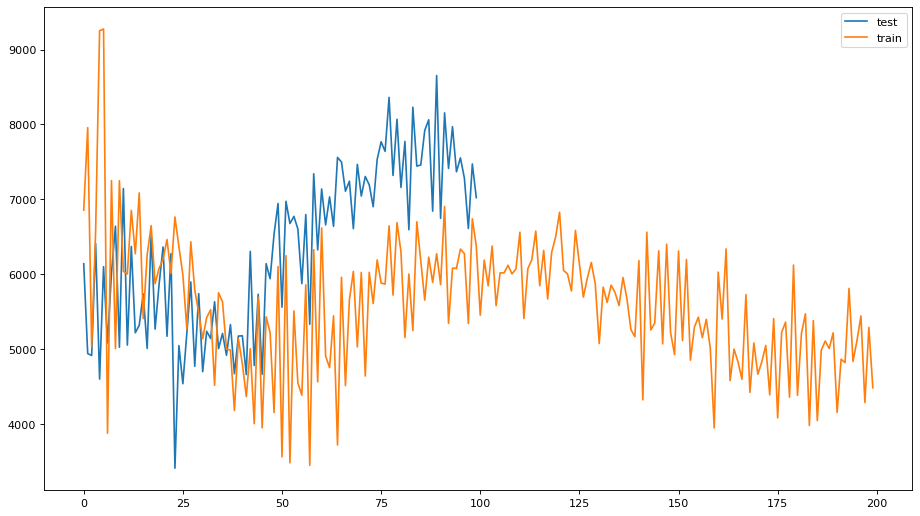

In [34]:
plt.figure(figsize=(14,8),dpi=80)
plt.plot(x_test, p1_test, label="test")
plt.plot(x_train, p1_train, label="train")
plt.legend()
plt.show()

In [41]:
A=[]
for i in range(0, len(p1_train) - N):
    A.append(p1_train[i:i+N])

In [45]:
AT = np.zeros((7, len(A)))

In [46]:
for i in range(len(A)):
    for j in range(len(A[i])):
        AT[j][i] = A[i][j]

In [88]:
AI = np.matrix(A).I

In [73]:
AT.T == A

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [48]:
AT.shape

(7, 193)

In [49]:
b=p1_train[N:]

In [56]:
b.shape

(193,)

In [93]:
x = np.dot(AI, b)

In [94]:
x.shape

(1, 7)

In [104]:
x[0]

matrix([[ 0.12206359, -0.04681476,  0.37429179,  0.02399262,  0.11180612,
          0.44829977, -0.0418415 ]])

In [97]:
A_test=[]
for i in range(0, len(p1_test) - N):
    A_test.append(p1_test[i:i+N])

In [100]:
res = np.dot(A_test, x)

ValueError: shapes (93,7) and (1,7) not aligned: 7 (dim 1) != 1 (dim 0)

In [115]:
res = np.matrix(A_test).dot(x.T)

In [108]:
res.shape

(93, 1)

In [112]:
res = res.reshape(1, 93)

In [116]:
x_test = [i for i in range(len(p1_test[7:]))]
x_res = [i for i in range(len(res))]

In [119]:
test_data = p1_test[7:]

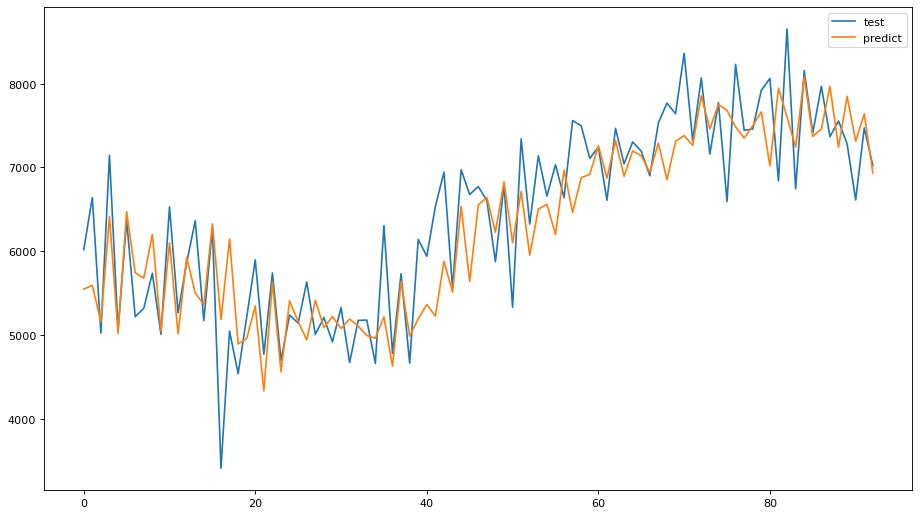

In [120]:
plt.figure(figsize=(14,8),dpi=80)
plt.plot(x_test, test_data, label="test")
plt.plot(x_res, res, label="predict")
plt.legend()
plt.show()

In [126]:
# MSE
mse = 0
for i in range(len(res)):
    mse += (test_data[i] - res[i])**2

In [128]:
mse / 93

matrix([[321799.10787831]])